In [1]:
# RA, 2019-09-21

# Auto-align upper/lower grid in twinx axes

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Matrix to stretch an interval (a, b) by a fraction left and right
# Usage: np.dot((a, b), stretch_interval(left, right))
def stretch_interval(left, right):
    # a' = a - (b - a) * left = a * (1 + left) - b * left
    # b' = b + (b - a) * right = -a * right + b * (1 + right)
    return np.transpose(np.asarray([[1 + left, -left], [-right, 1 + right]]))

In [3]:
# Auto-align upper/lower grid lines
def align_hilo_ylim(ax1: plt.Axes, ax2: plt.Axes):
    # Limits
    ((a1, b1), (a2, b2)) = (ax1.get_ylim(), ax2.get_ylim())

    # Visible ticks
    t1 = np.asarray([y for y in ax1.get_yticks() if (a1 <= y <= b1)])
    t2 = np.asarray([y for y in ax2.get_yticks() if (a2 <= y <= b2)])

    # Relative position of ticks
    r1 = (t1 - a1) / (b1 - a1)
    r2 = (t2 - a2) / (b2 - a2)

    # Lower and upper space
    lo = max(min(r1) - 0, min(r2) - 0)
    hi = max(1 - max(r1), 1 - max(r2))

    # Stretch the middle part (usually breaks everything)
    (s1, s2) = (1, 1)

    # Adjust lower and upper space
    f1 = s1 * (max(t1) - min(t1)) / (1 - hi - lo)
    f2 = s2 * (max(t2) - min(t2)) / (1 - hi - lo)
    (a1, b1) = (-lo * f1 + min(t1), +hi * f1 + min(t1) + s1 * (max(t1) - min(t1)))
    (a2, b2) = (-lo * f2 + min(t2), +hi * f2 + min(t2) + s2 * (max(t2) - min(t2)))

    # Set limits
    ax1.set_ylim(a1, b1)
    ax2.set_ylim(a2, b2)

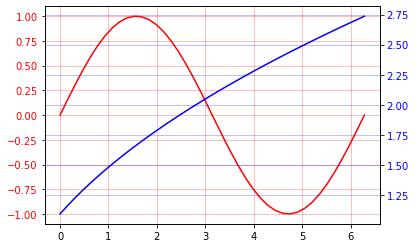

In [4]:
fig: plt.Figure
ax1: plt.Axes
ax2: plt.Axes
(fig, ax1) = plt.subplots()
ax2 = ax1.twinx()

xx = np.linspace(0, 2 * np.pi, 42)

# Colors
(c1, c2) = ('r', 'b')

ax1.tick_params(axis='y', labelcolor=c1)
ax2.tick_params(axis='y', labelcolor=c2)

ax1.plot(xx, np.sin(xx), color=c1)
ax2.plot(xx, np.sqrt(xx + 1.2), color=c2)

ax1.grid(color=c1, linewidth=0.5, alpha=0.5)
ax2.grid(color=c2, linewidth=0.5, alpha=0.5)

# Remember original limits before fiddling
ax2_ylim = ax2.get_ylim()

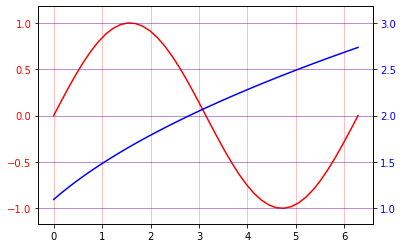

In [5]:
# The fiddly part (could make interactive)
ax2.set_ylim(*np.dot(ax2_ylim, stretch_interval(0.1, 0.2)))

# Align upper/lower grid lines
align_hilo_ylim(ax1, ax2)

fig